# Question 2: Which factor influences the review score?

### Strategy:
I will create a series of plots to understand the relationship between the review score and the other main features: location, price, fees, amenities, and host.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
seattle_listings = pd.read_csv('Seattle/seattle_listings_preprocessed.csv')

### Step 1
Review score vs. neighborhood and property

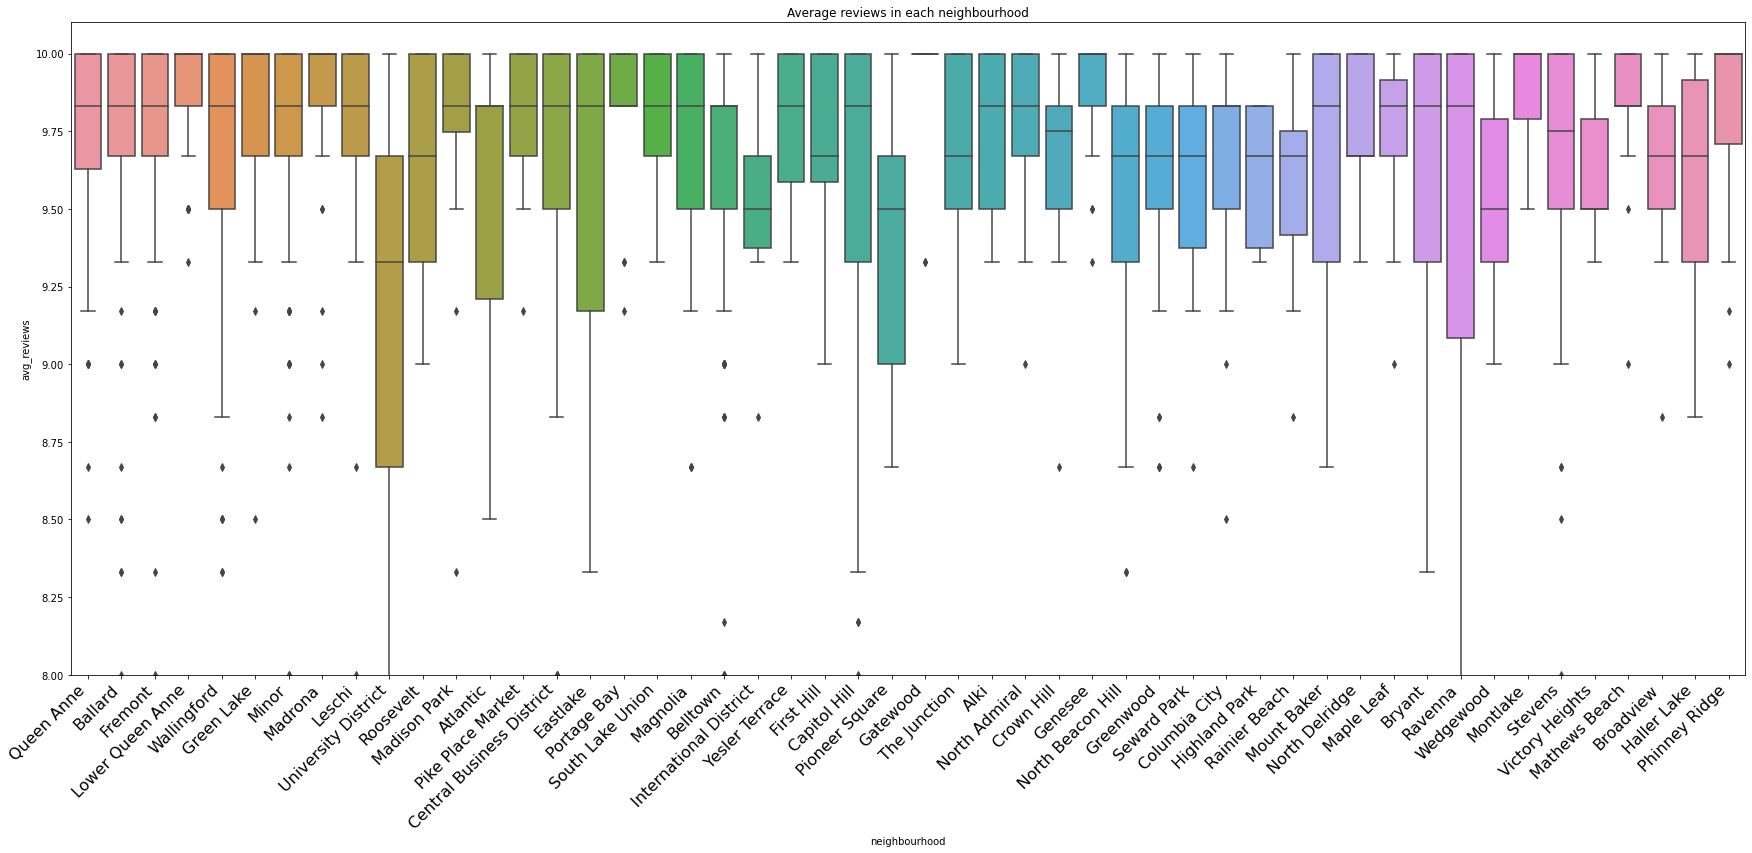

In [3]:
plt.figure(figsize=(30,12))
plt.title("Average reviews in each neighbourhood")

sns.boxplot(data=seattle_listings, x='neighbourhood', y='avg_reviews')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([8,10.1])
plt.savefig('avg_reviews_neighbourhood.png', bbox_inches='tight');

Most of neighborhoods have properties with very high reviews, above 9.5. A few neighborhoods, though, have lower average reviews: University District, International District, Pioneer Square, and Gatewood. These neighborhood also had low bookings rate, while others, like Magnolia, Yesler Terrace, The Junction, and Victory Heights, have good review, but low booking rates.  

The average review parameter has been calculated by averaging all the review scores: ratings, accuracy, cleanliness, check in, communication, location and value. Let's see if one or more of these factors negatively influences the average.

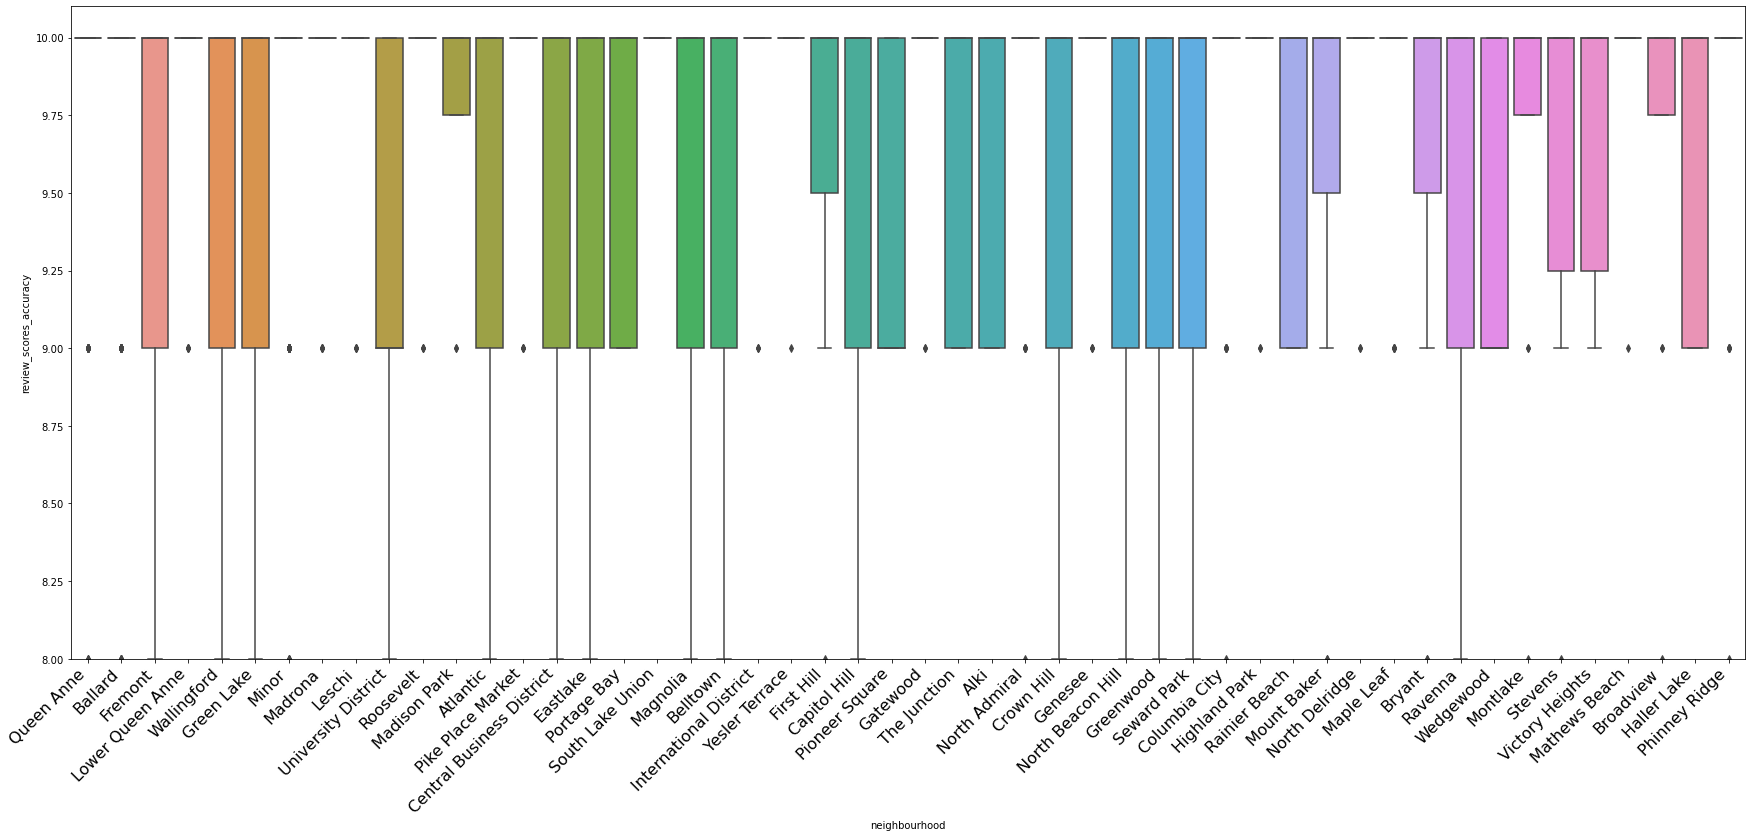

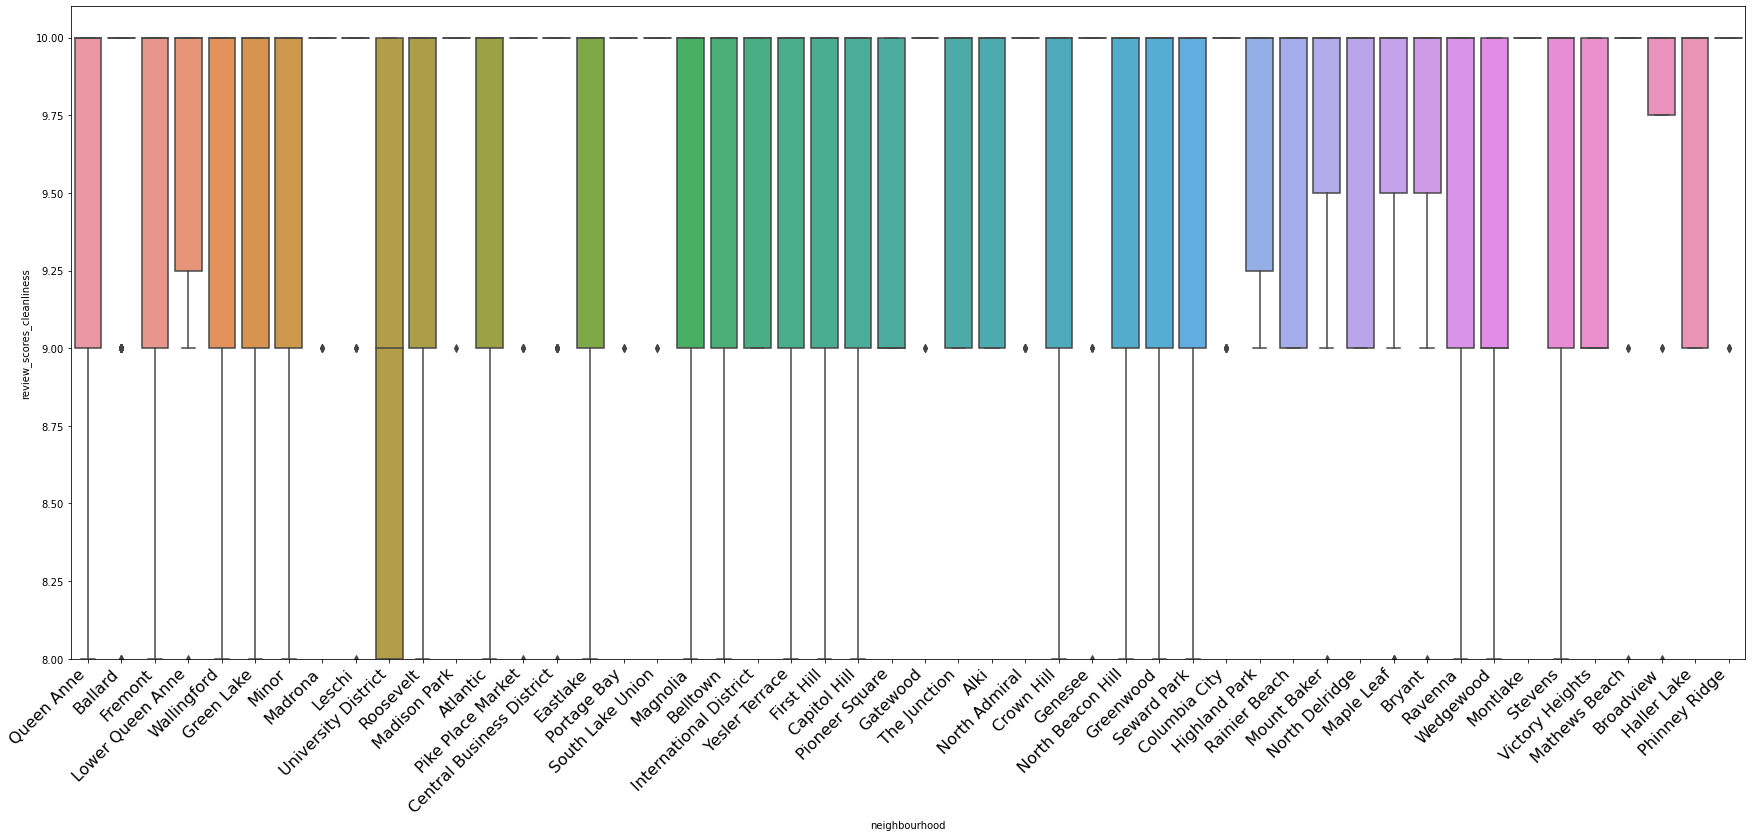

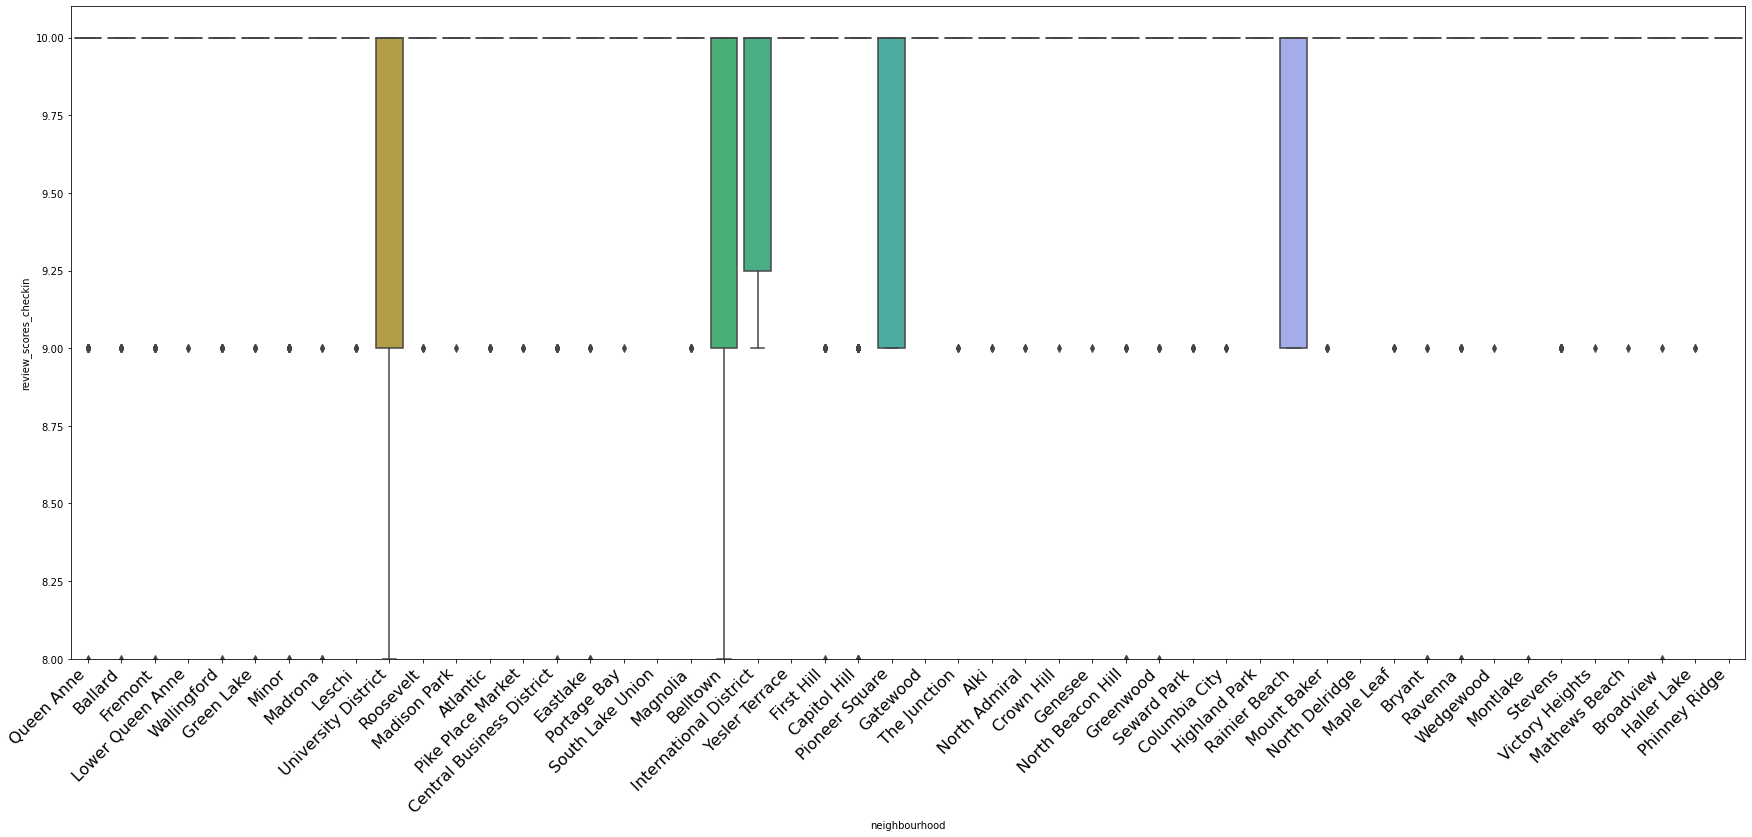

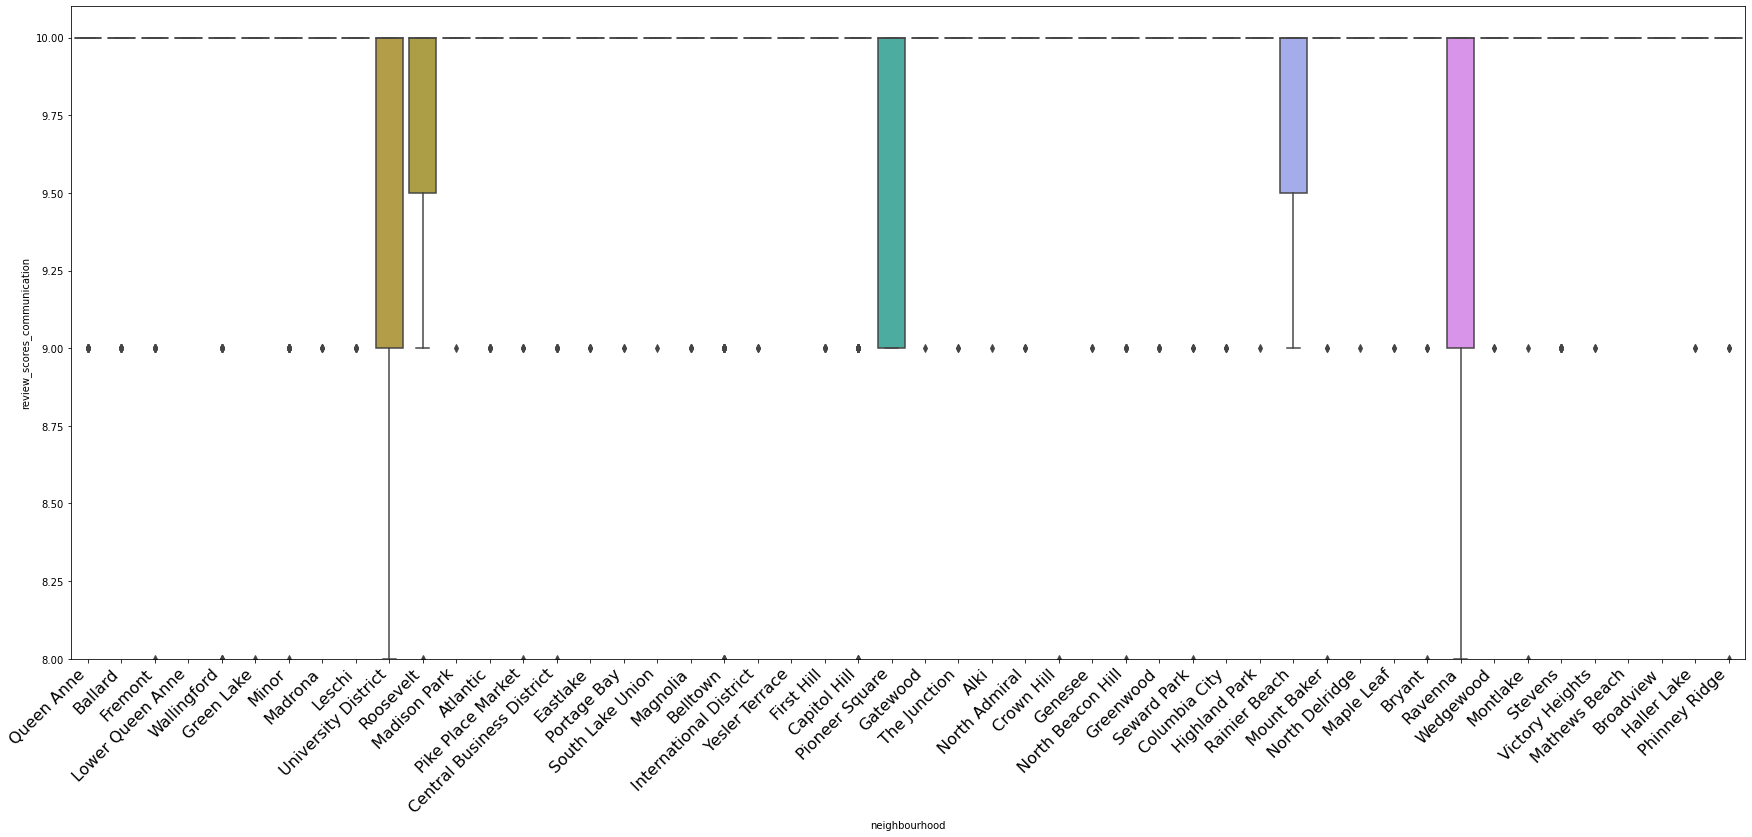

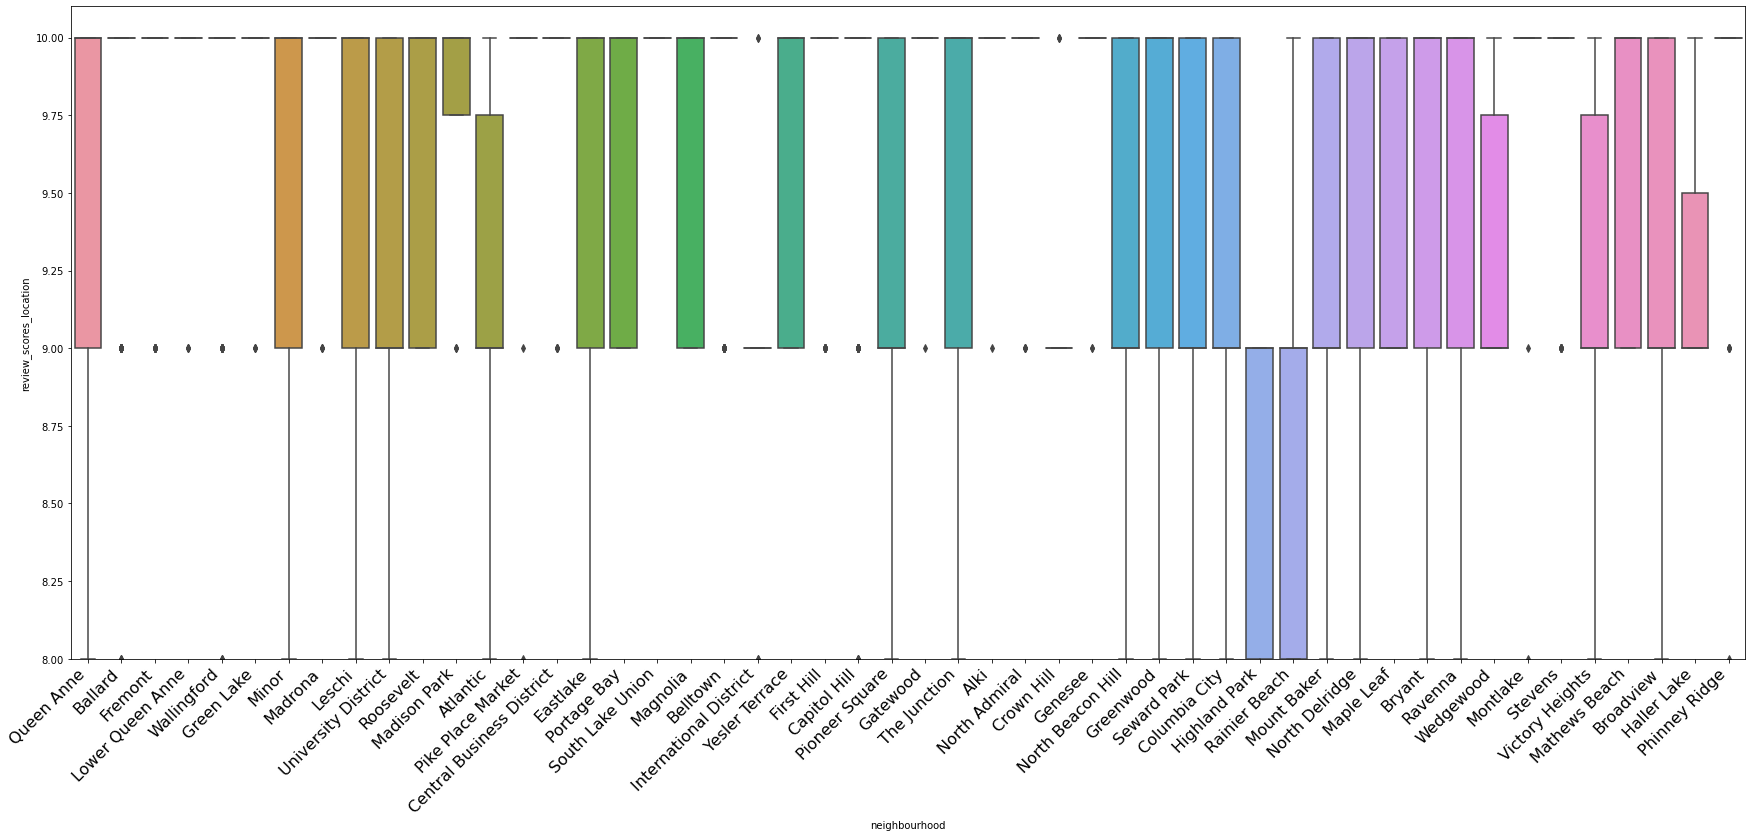

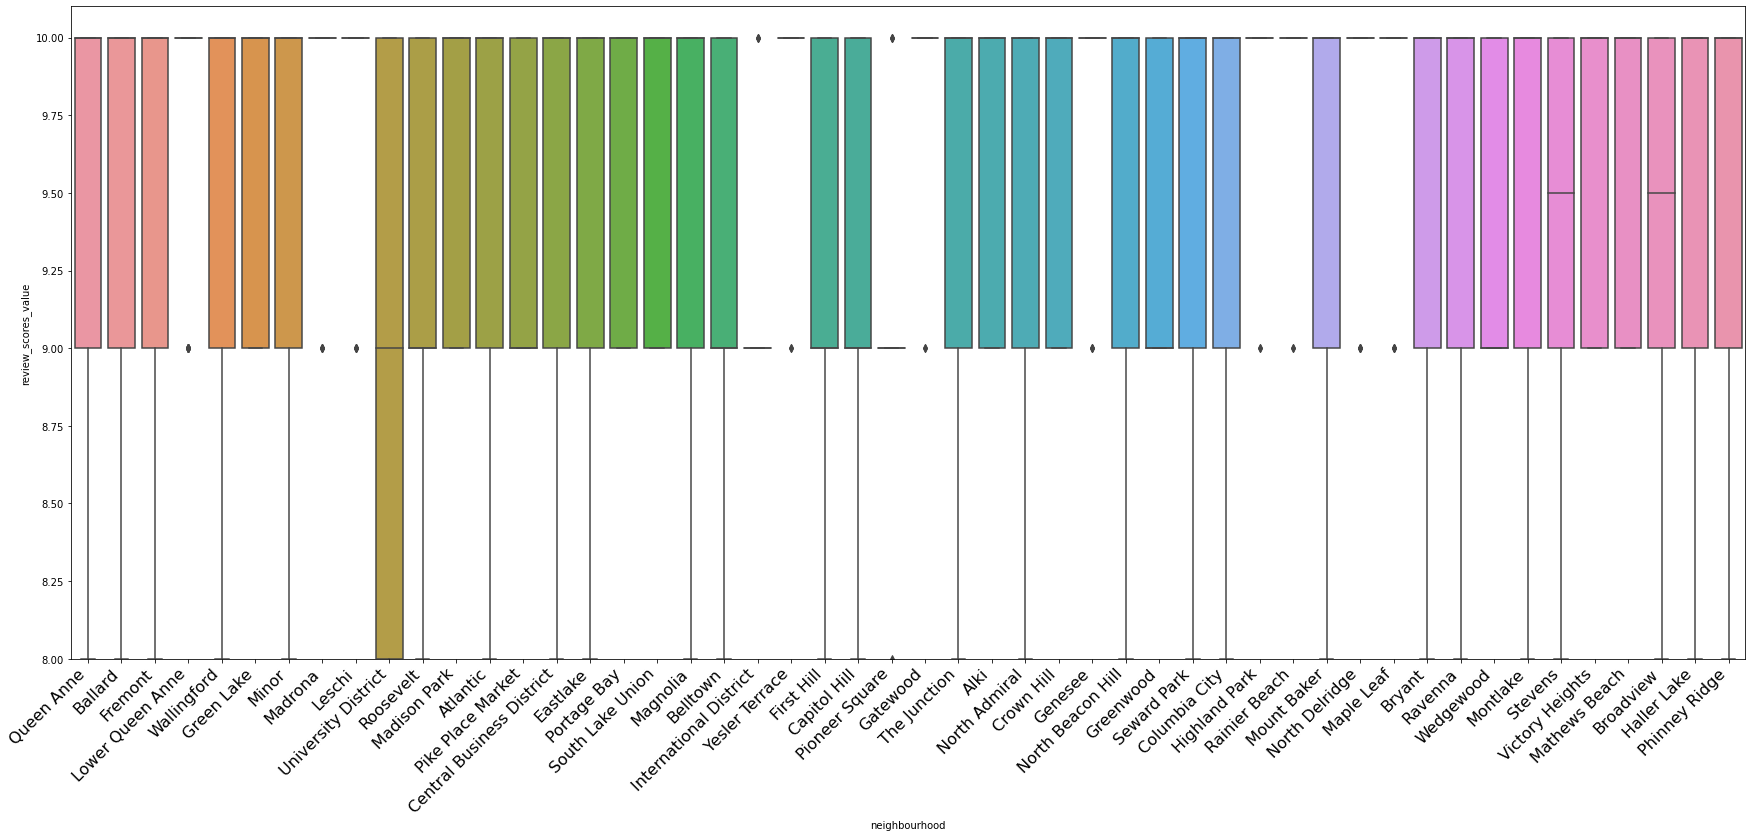

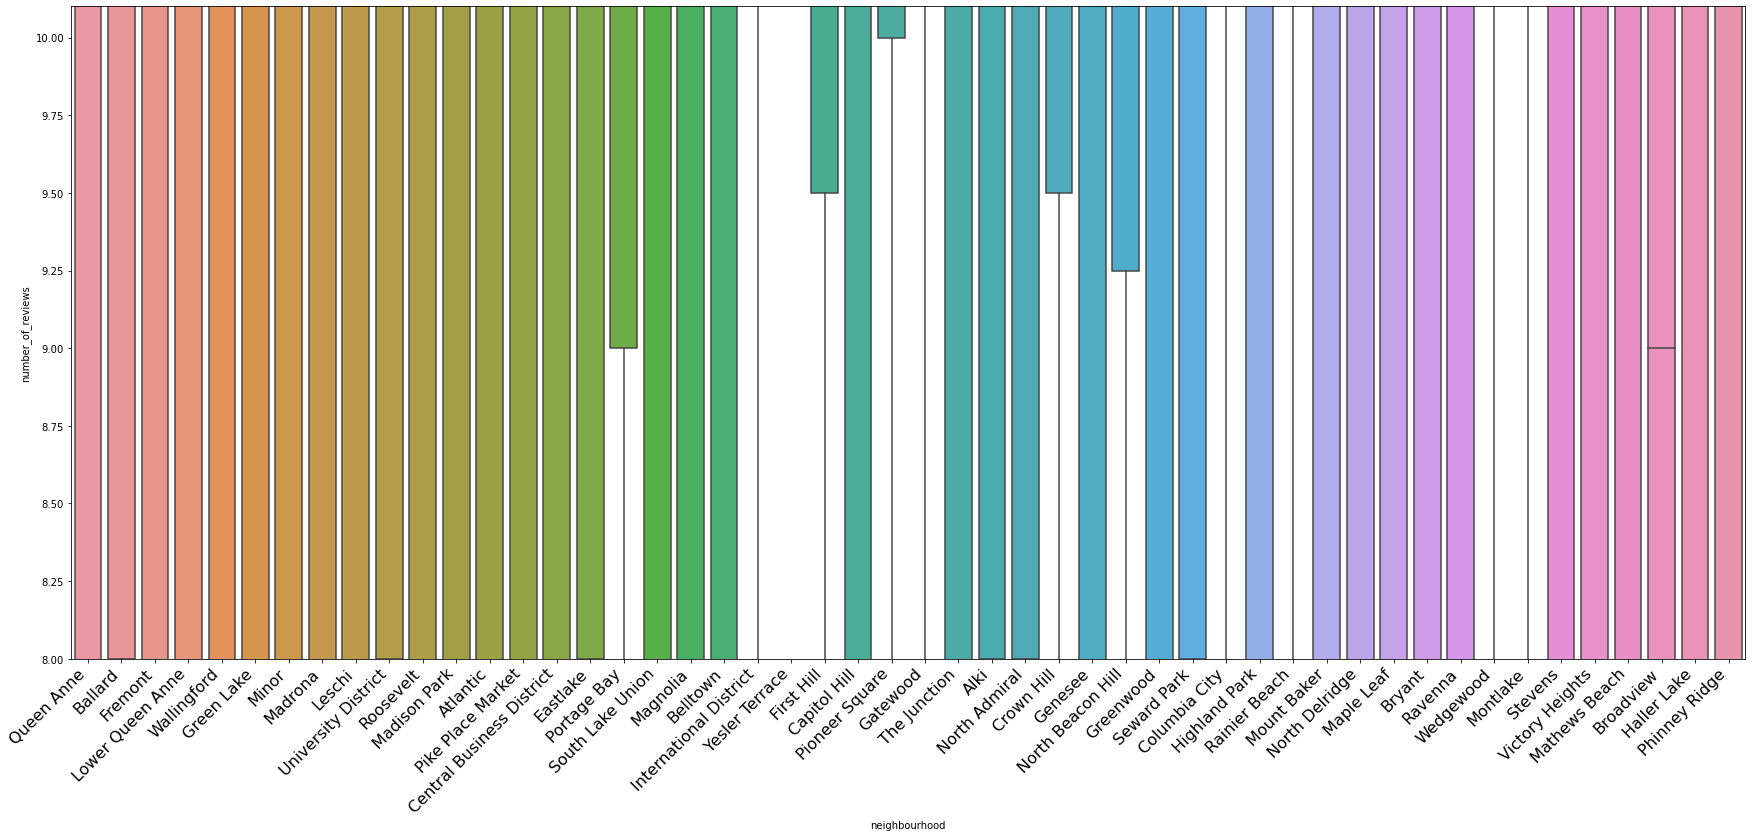

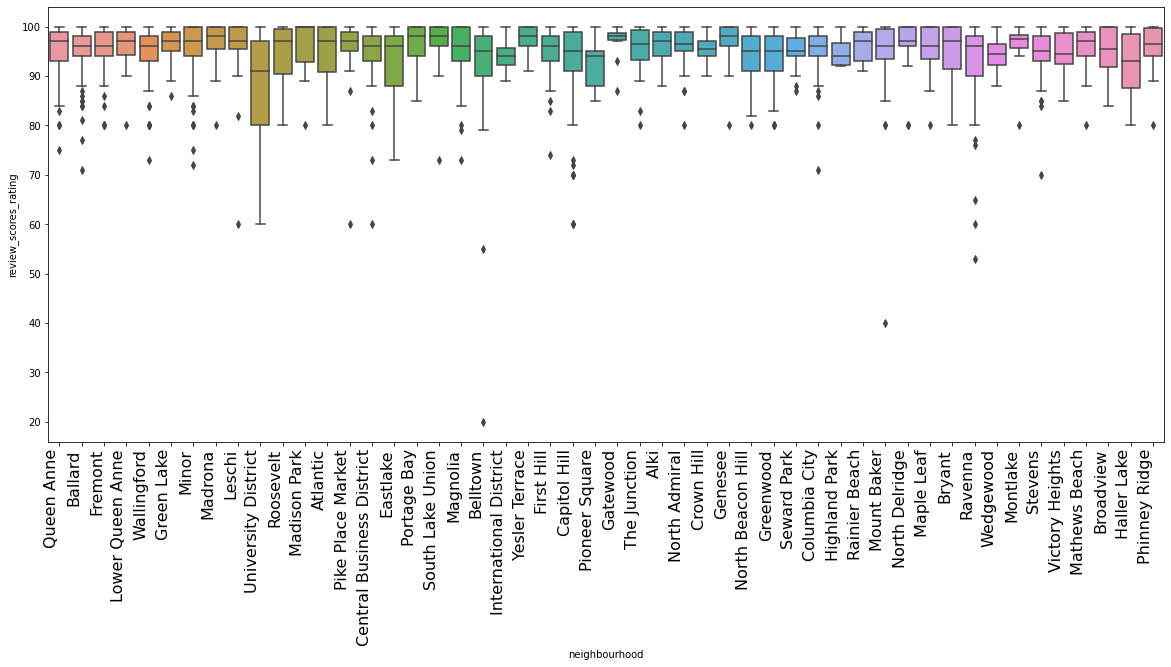

In [4]:
def feature_vs_reviews(dataset, reference_c):
    
    '''
    INPUT
        dataset: The dataset with the data to be plot
        
    OUTPUT
        Boxplots showing the relation between the property review and a the neighbourhood.
    '''
    selected_col = ['review_scores_accuracy', 
                    'review_scores_cleanliness',  
                    'review_scores_checkin',           
                    'review_scores_communication',   
                    'review_scores_location', 
                    'review_scores_value', 
                    'number_of_reviews']

    for col in selected_col:
        plt.figure(figsize=(30,12))
        sns.boxplot(data=dataset, x=reference_c, y=col)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
        plt.ylim([8,10.1])
        plt.savefig('neighbourhood_'+col+'.png', bbox_inches='tight');
        
    #----------------------------------------------------------------------#
    plt.figure(figsize=(20,8))
    
    sns.boxplot(data=dataset, x=reference_c, y='review_scores_rating')
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=16)
    plt.savefig('neighbourhood_review_scores_rating.png', bbox_inches='tight');
    
feature_vs_reviews(seattle_listings, 'neighbourhood')

It looks like University District is not very clean and the listings have a low value, while Highland Park and Rainier Beach are not considered good neighborhoods.  

These results needs to be better understood, by looking at the property type listed in each neighborhood.

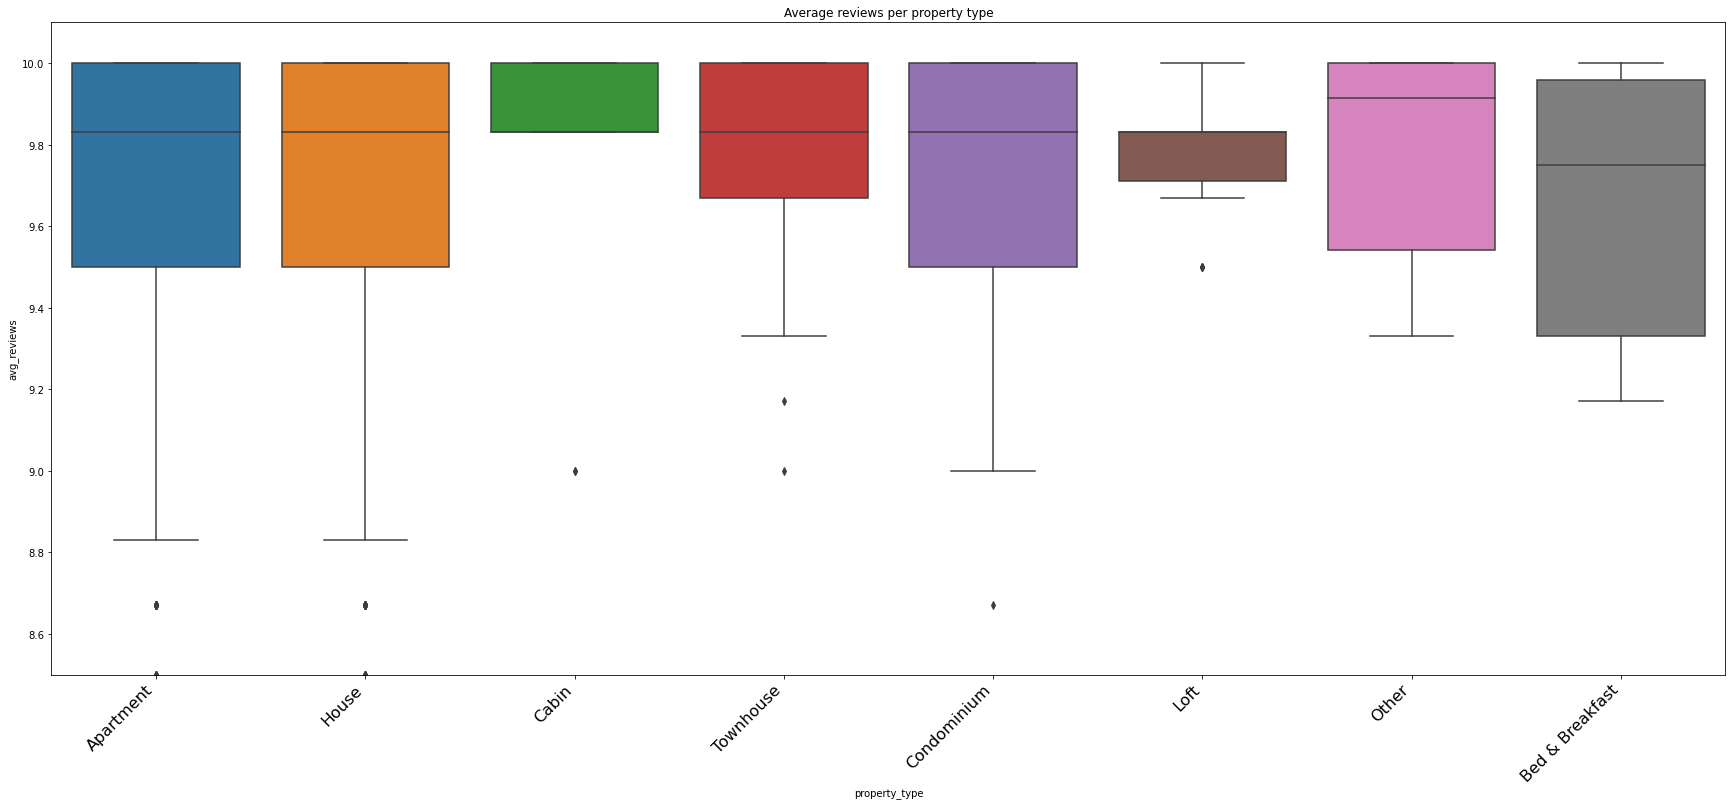

In [6]:
plt.figure(figsize=(30,12))
plt.title("Average reviews per property type")

sns.boxplot(data=seattle_listings, x='property_type', y='avg_reviews')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([8.5,10.1])
plt.savefig('avg_reviews_property_type.png', bbox_inches='tight');

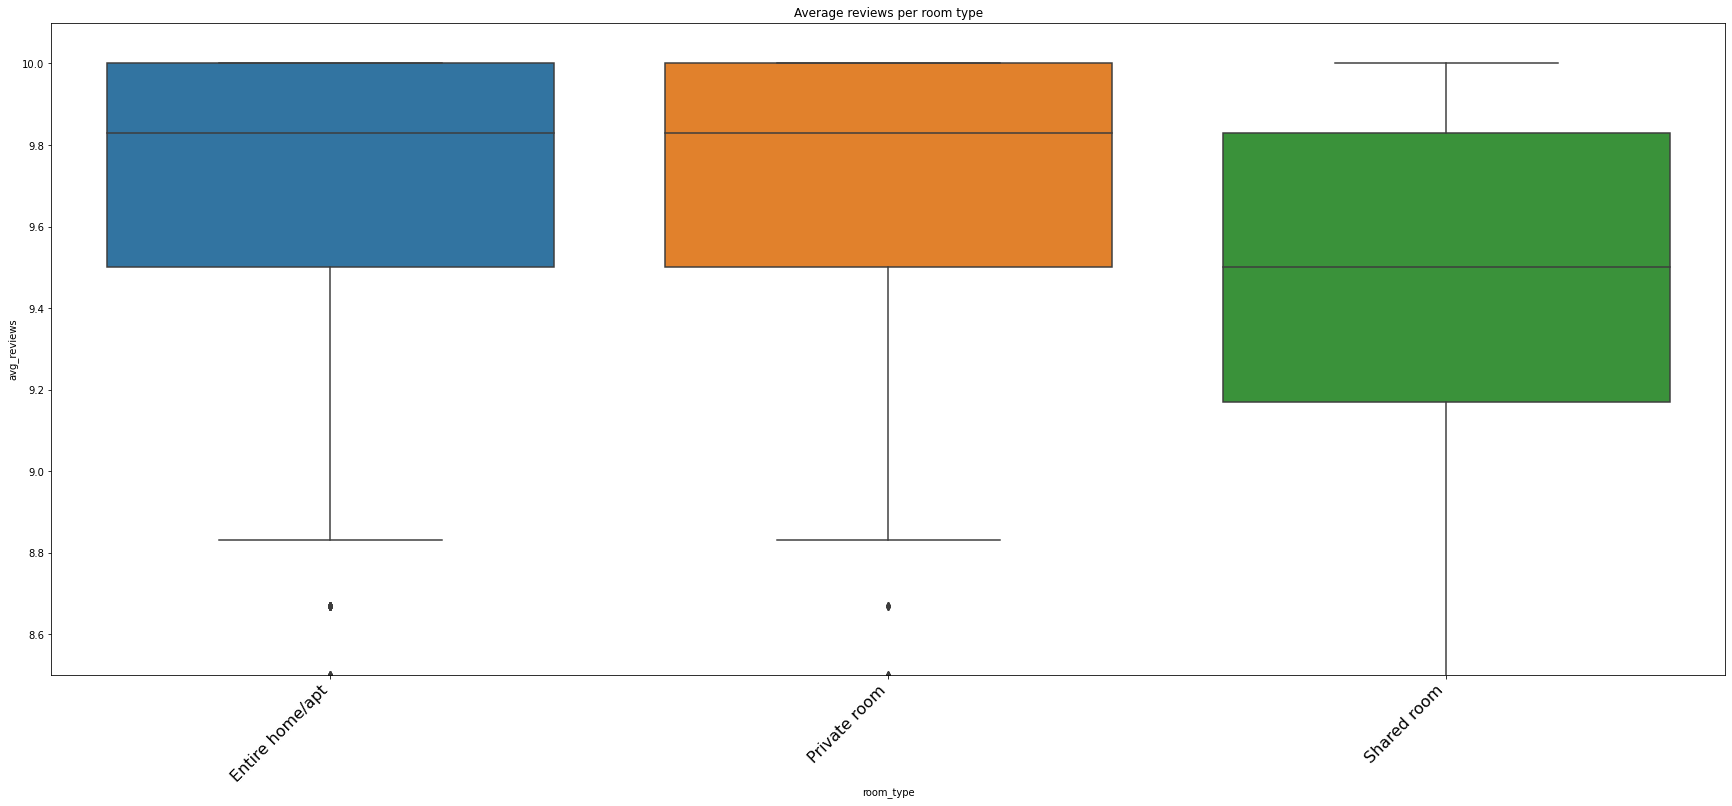

In [7]:
plt.figure(figsize=(30,12))
plt.title("Average reviews per room type")

sns.boxplot(data=seattle_listings, x='room_type', y='avg_reviews')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([8.5,10.1])
plt.savefig('avg_reviews_room_type.png', bbox_inches='tight');

People really love cabins and townhouses, mostly if they can have a private room or an entire place, but are not much into lofts and shared spaces.

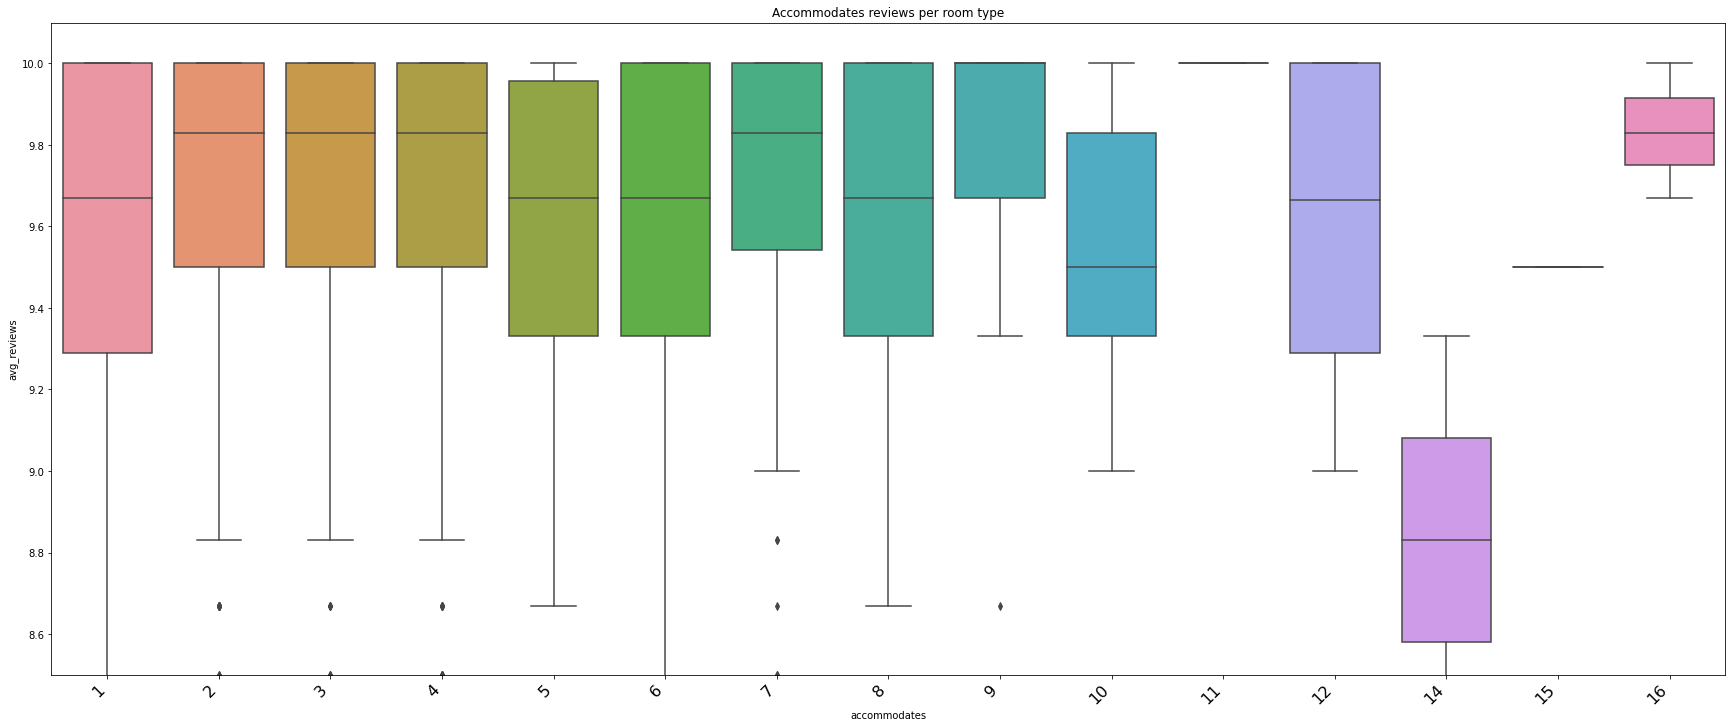

In [8]:
plt.figure(figsize=(30,12))
plt.title("Accommodates reviews per room type")

sns.boxplot(data=seattle_listings, x='accommodates', y='avg_reviews')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([8.5,10.1])
plt.savefig('avg_reviews_accommodates.png', bbox_inches='tight')

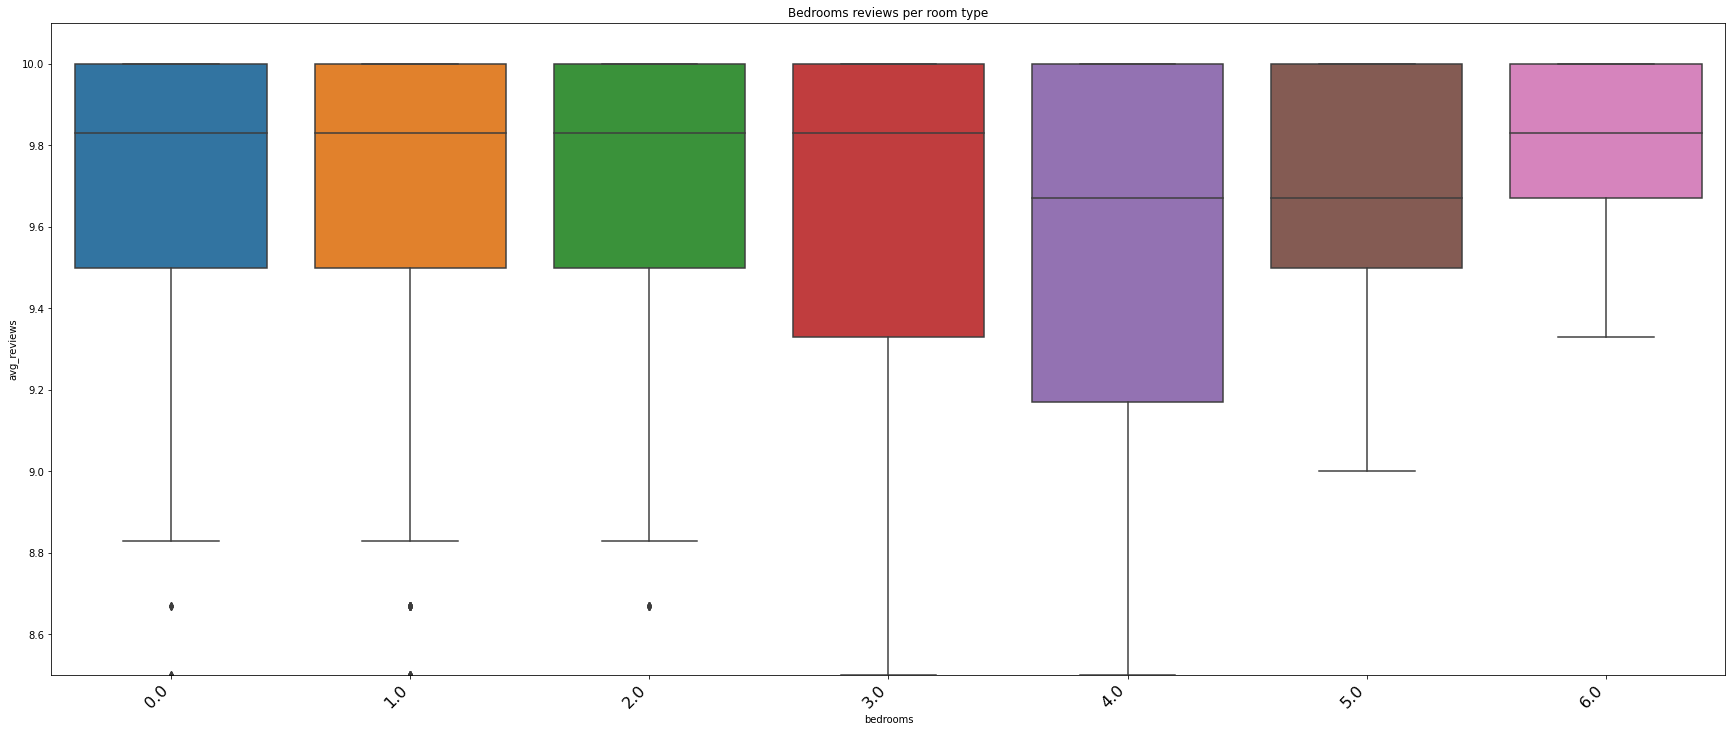

In [9]:
plt.figure(figsize=(30,12))
plt.title("Bedrooms reviews per room type")

sns.boxplot(data=seattle_listings, x='bedrooms', y='avg_reviews')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([8.5,10.1])
plt.savefig('avg_reviews_bedrooms.png', bbox_inches='tight')

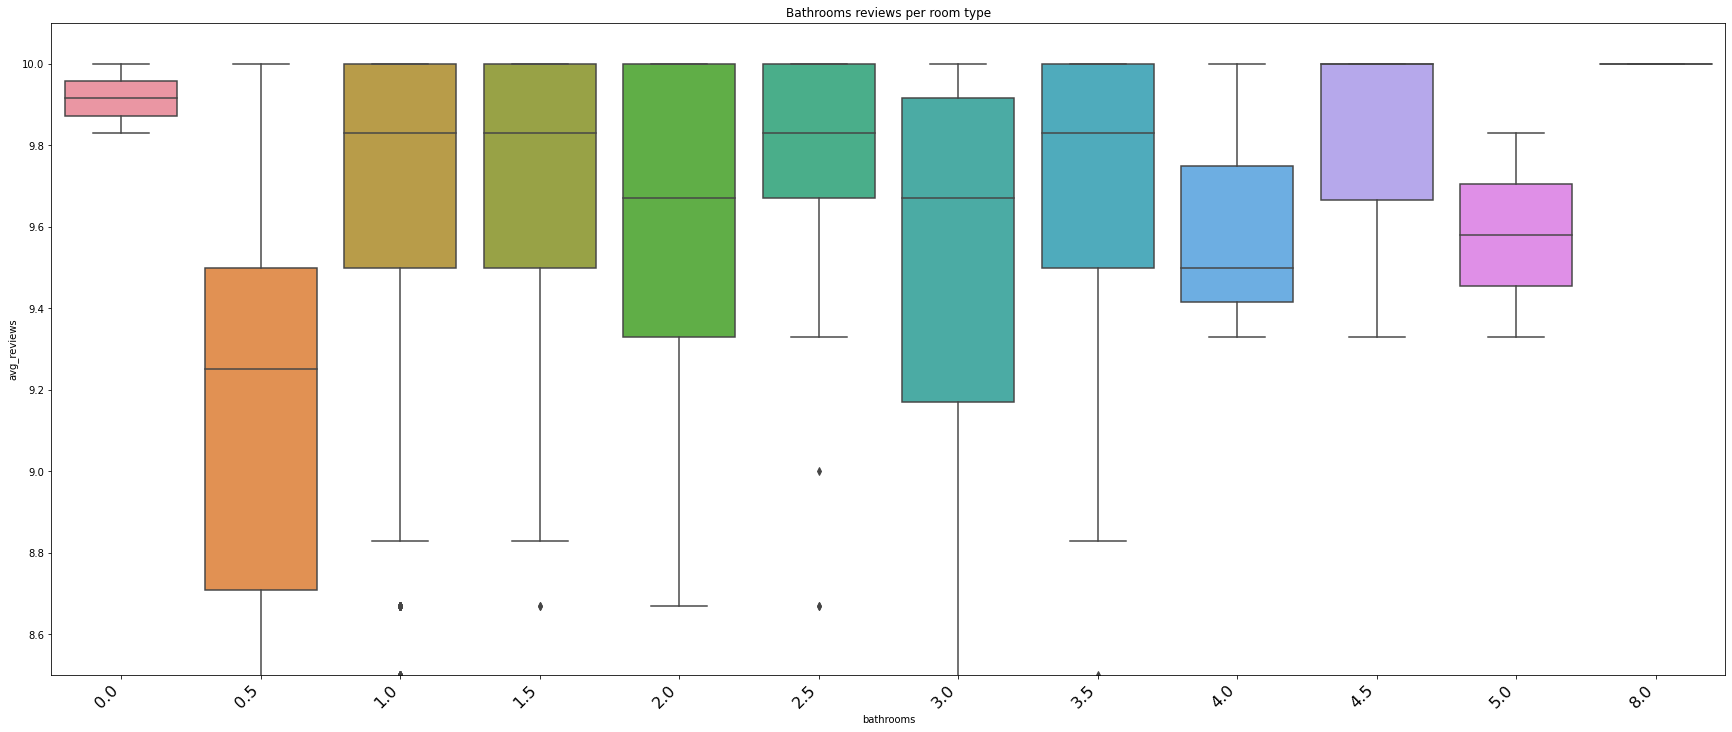

In [10]:
plt.figure(figsize=(30,12))
plt.title("Bathrooms reviews per room type")

sns.boxplot(data=seattle_listings, x='bathrooms', y='avg_reviews')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([8.5,10.1])
plt.savefig('avg_reviews_bathrooms.png', bbox_inches='tight')

### Step 2
Average reviews vs. price, fees, and amenities

<ipython-input-11-5a676da09046>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



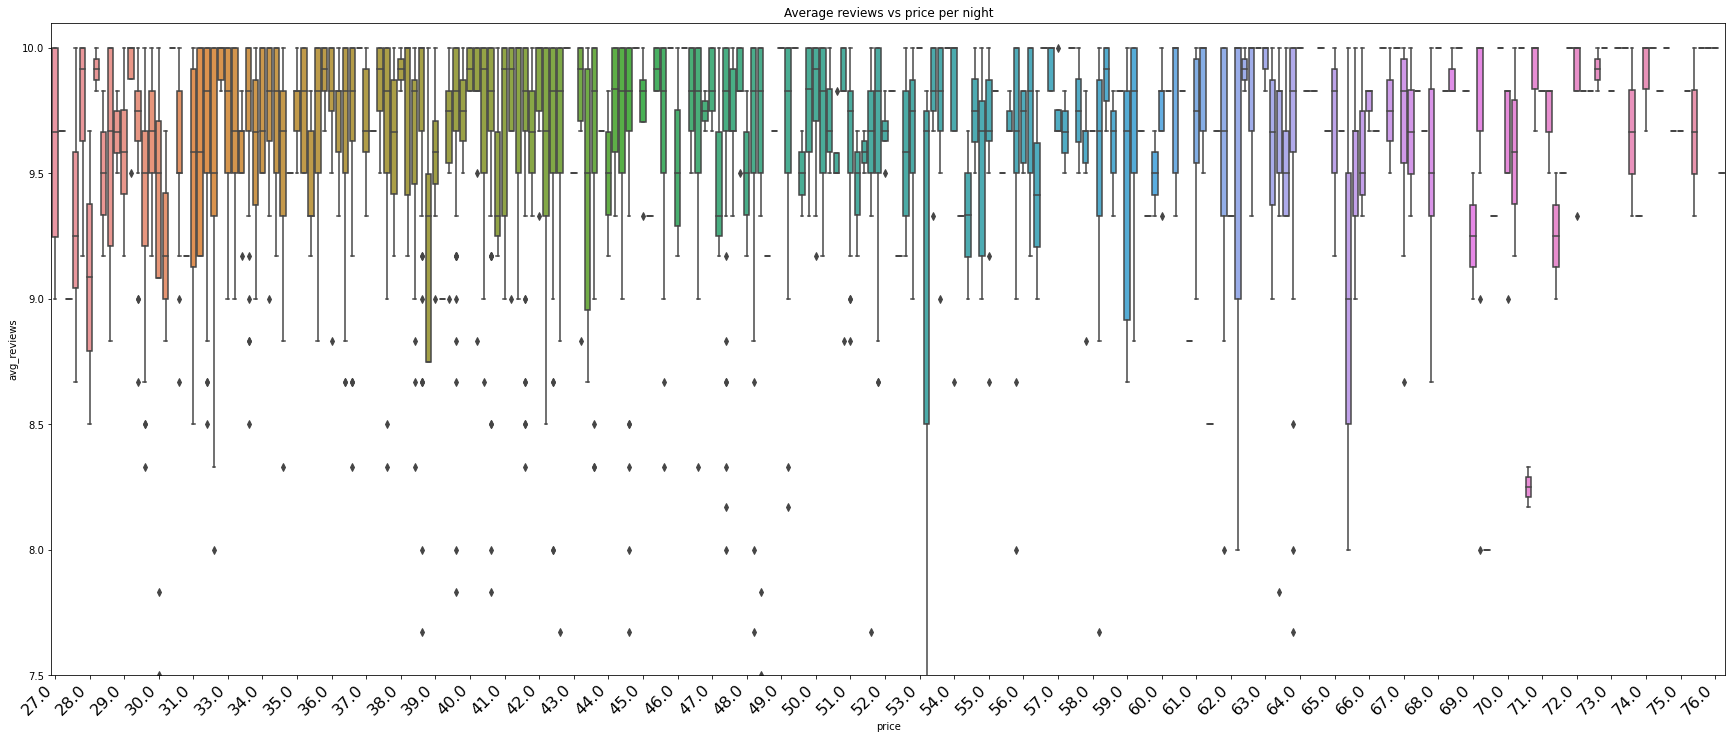

In [11]:
plt.figure(figsize=(30,12))
plt.title("Average reviews vs price per night")

sns.boxplot(data=seattle_listings, x='price', y='avg_reviews')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([7.5,10.1])
plt.savefig('avg_reviews_price.png', bbox_inches='tight');

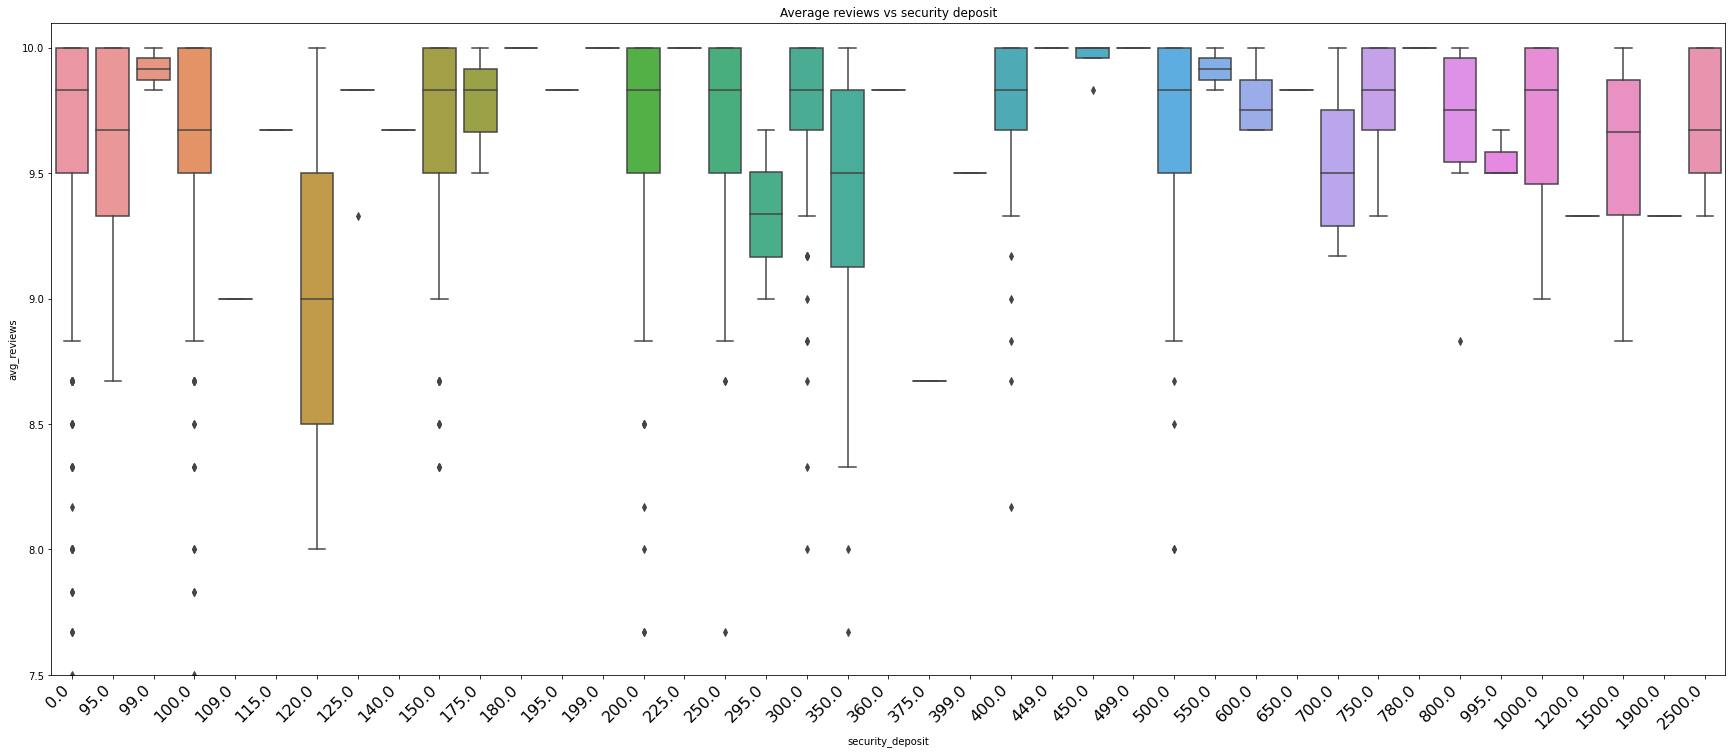

In [12]:
plt.figure(figsize=(30,12))
plt.title("Average reviews vs security deposit")

sns.boxplot(data=seattle_listings, x='security_deposit', y='avg_reviews')
ax = plt.gca()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([7.5,10.1])
plt.savefig('avg_reviews_deposit.png', bbox_inches='tight');

<ipython-input-13-defe9d494f6e>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



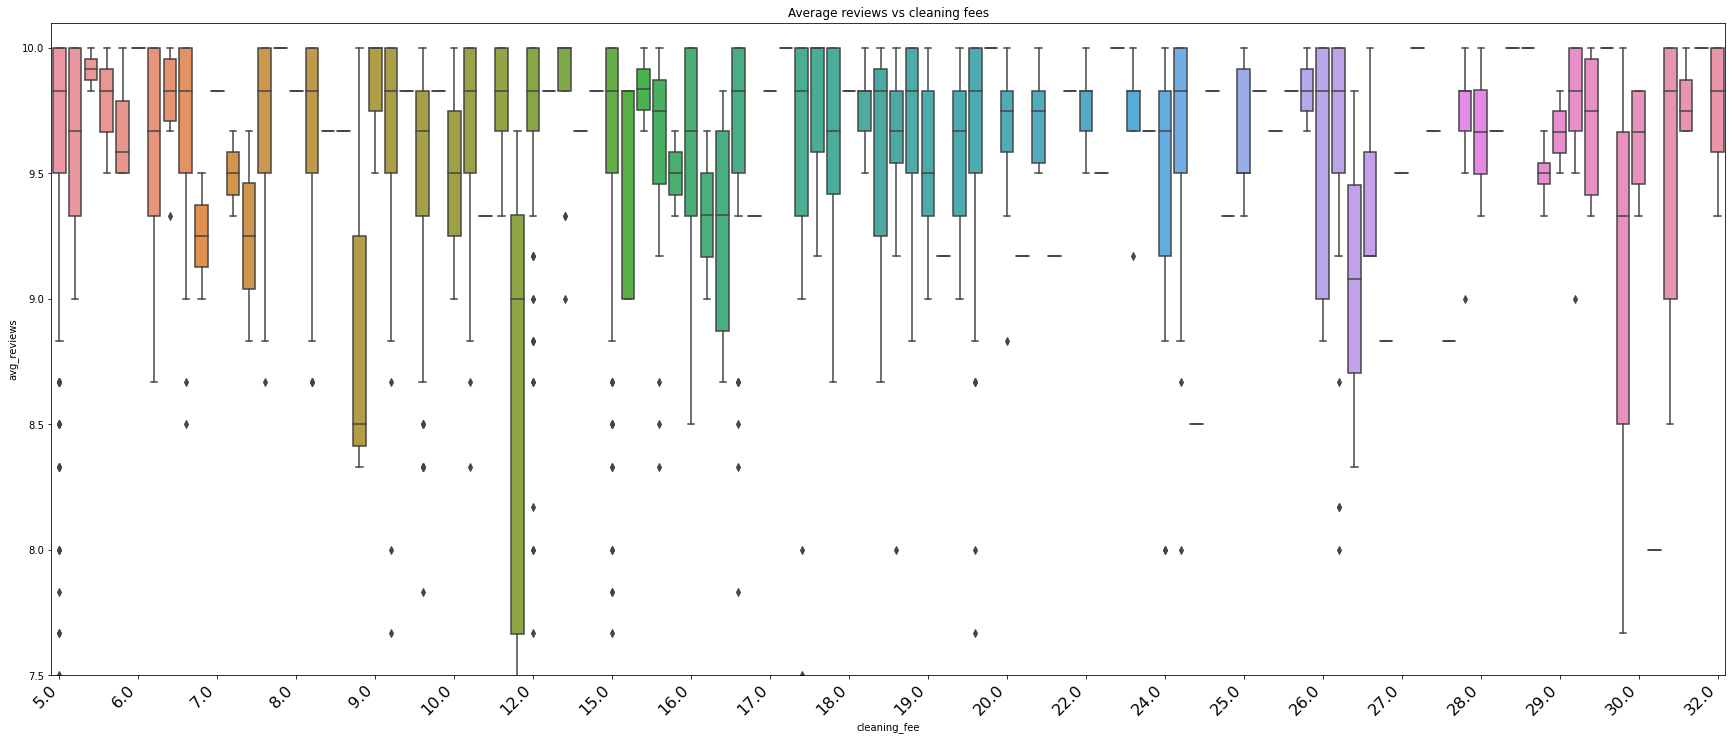

In [13]:
plt.figure(figsize=(30,12))
plt.title("Average reviews vs cleaning fees")

sns.boxplot(data=seattle_listings, x='cleaning_fee', y='avg_reviews')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([7.5,10.1])
plt.savefig('avg_reviews_cleaning_fee.png', bbox_inches='tight');

Like observed for the bookings rate, the price per night doesn't influence the average review score. Asking for a deposit or for cleaning fees, and increasing the amenities offered is not relevant either.

<ipython-input-14-361a85f4703a>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



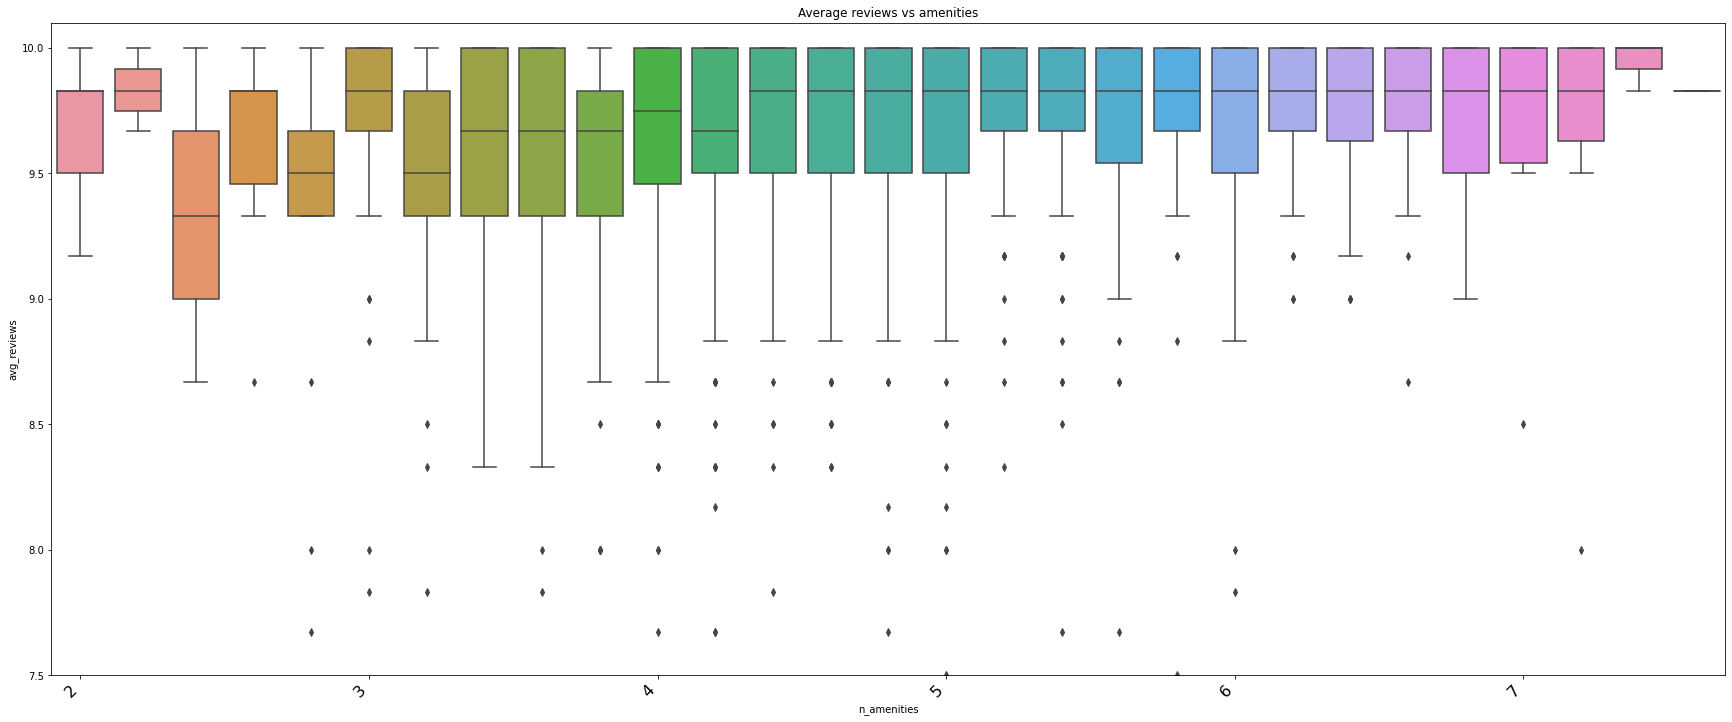

In [14]:
plt.figure(figsize=(30,12))
plt.title("Average reviews vs amenities")

sns.boxplot(data=seattle_listings, x='n_amenities', y='avg_reviews')
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

plt.ylim([7.5,10.1])
plt.savefig('avg_reviews_cleaning_amenities.png', bbox_inches='tight');

### Step 3
Average reviews vs. host

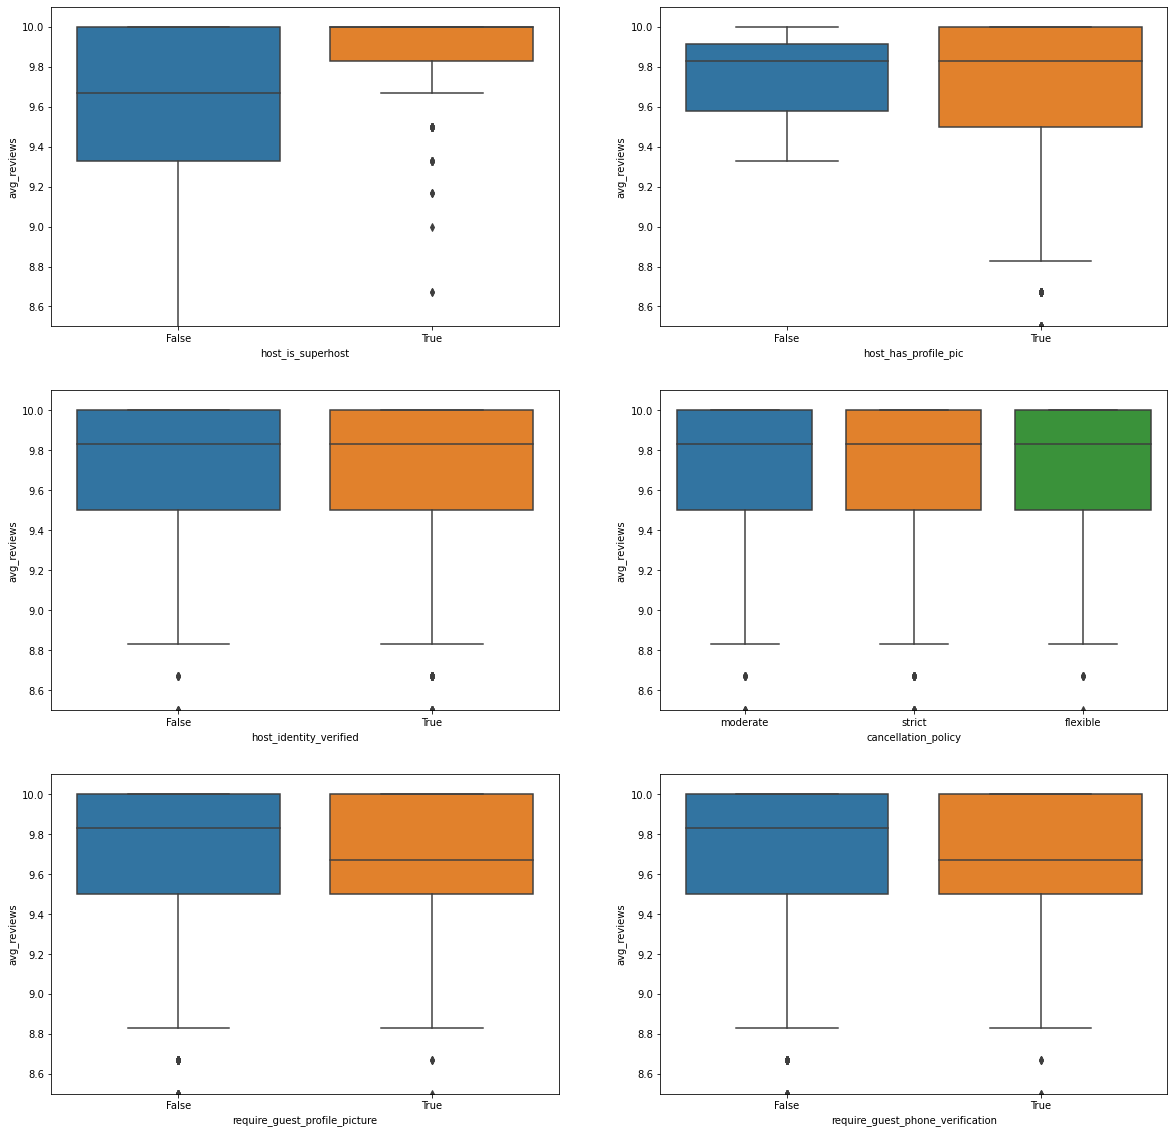

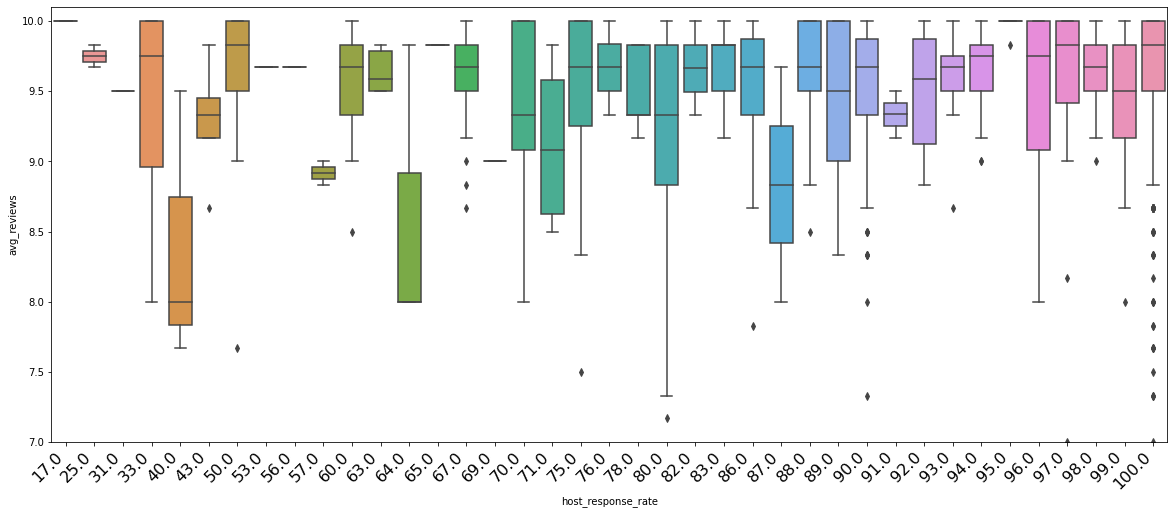

In [15]:
def feature_vs_host(dataset, reference_c, y_min, y_max):
    
    '''
    INPUT
        dataset: The dataset with the data to be plot
        
    OUTPUT
        Boxplots showing the relation betwenn the host characteristincs, and a average reviees.
    '''
    selected_col = ['host_is_superhost',     
                    'host_has_profile_pic',
                    'host_identity_verified', 
                    'cancellation_policy',             
                    'require_guest_profile_picture',   
                    'require_guest_phone_verification']

    fig, axs = plt.subplots(3, 2, figsize=(20, 20))
    fig.subplots_adjust(hspace =0.2 , wspace=.2)
    axs = axs.ravel()
    
    y_min_2 = y_min+1.5
    for i in range(6):
        sns.boxplot(data=dataset, x=selected_col[i], y=reference_c, ax=axs[i])
        axs[i].set_ylim(y_min_2, y_max)
        axs[i] = plt.gca()
#         axs[i].set_xticklabels(axs[i].get_xticklabels(), ha='right', fontsize=16);
    
    plt.savefig('Property-room_review_host_general.png', bbox_inches='tight');
    
    #----------------------------------------------------------------------#
    plt.figure(figsize=(20,8))
    
    sns.boxplot(data=dataset, x='host_response_rate', y=reference_c)
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    plt.ylim(y_min, y_max)
    
    plt.savefig('Property-room_review_host_response_rate.png', bbox_inches='tight');
    
feature_vs_host(seattle_listings, 'avg_reviews', 7, 10.1)  

Becoming a super host and not asking for profile pictures and phone verification can highly increase the average reviews.

## Key takeaways

To increase average reviews:
1. Offering private rooms or a whole place, rather than shared ones.
2. Becoming a super host and keep your response rate high.
3. Avoid asking the guests profile pictures and phone verification